# **Titanic DataSet**

In [351]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [352]:
df = pd.read_csv('/content/titanic.csv')

In [353]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [354]:
df.shape

(891, 12)

In [355]:
columns_to_drop = ['Ticket', 'Cabin', 'PassengerId']

In [356]:
df = df.drop(columns_to_drop, axis=1)

In [357]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [358]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [359]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [360]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# **Exploratory Data Analysis**

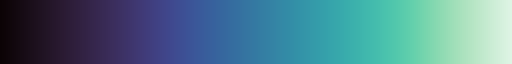

In [361]:
sns.color_palette("mako", as_cmap=True)

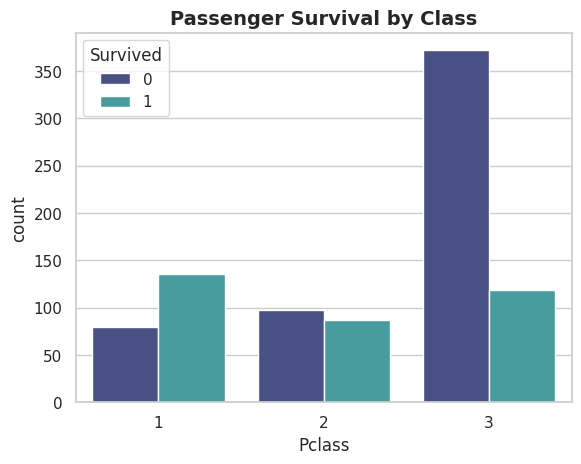

In [362]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
sns.set(style="whitegrid")
sns.countplot(data=df, x="Pclass", hue="Survived", palette="mako")
plt.title('Passenger Survival by Class', fontweight='bold',fontsize=14)
plt.show()


In [363]:
emb=pd.DataFrame(df['Embarked'].value_counts())
emb

,Embarked
S,646
C,168
Q,77


In [364]:
import pandas as pd
survival_counts = df['Survived'].value_counts()

survived_count = survival_counts[1]
died_count = survival_counts[0]

print(f"Number of passengers who survived: {survived_count}")
print(f"Number of passengers who died: {died_count}")

Number of passengers who survived: 342
Number of passengers who died: 549


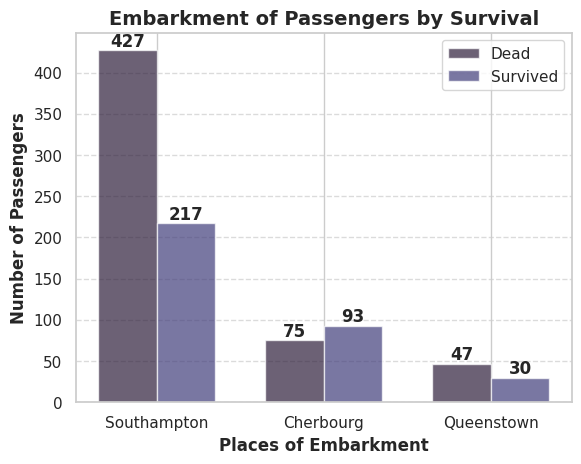

In [365]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_palette("mako")

places = ['Southampton', 'Cherbourg', 'Queenstown']
passengers = [644, 168, 77]
dead = [427, 75, 47]  # Number of passengers who died
survived = [217, 93, 30]  # Number of passengers who survived

bar_width = 0.35
index = range(len(places))

plt.bar(index, dead, bar_width, label='Dead', alpha=0.7)
plt.bar([i + bar_width for i in index], survived, bar_width, label='Survived', alpha=0.7)

plt.title('Embarkment of Passengers by Survival', fontweight='bold', fontsize=14)
plt.xlabel('Places of Embarkment', fontweight='bold', fontsize=12)
plt.ylabel('Number of Passengers', fontweight='bold', fontsize=12)
plt.xticks([i + bar_width / 2 for i in index], places, rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)


for i, j, k in zip(index, dead, survived):
    plt.text(i, j + 5, str(j), ha='center', fontsize=12, fontweight='bold')
    plt.text(i + bar_width, k + 5, str(k), ha='center', fontsize=12, fontweight='bold')

plt.legend()
plt.show()



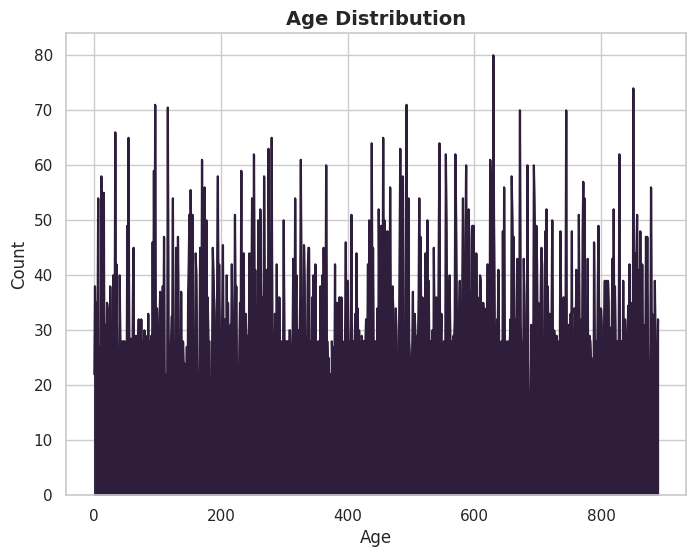

In [366]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import networkx as nx


# Area Chart
df['Age'].plot(kind='area', figsize=(8, 6))
plt.title('Age Distribution', fontweight='bold', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Fare')

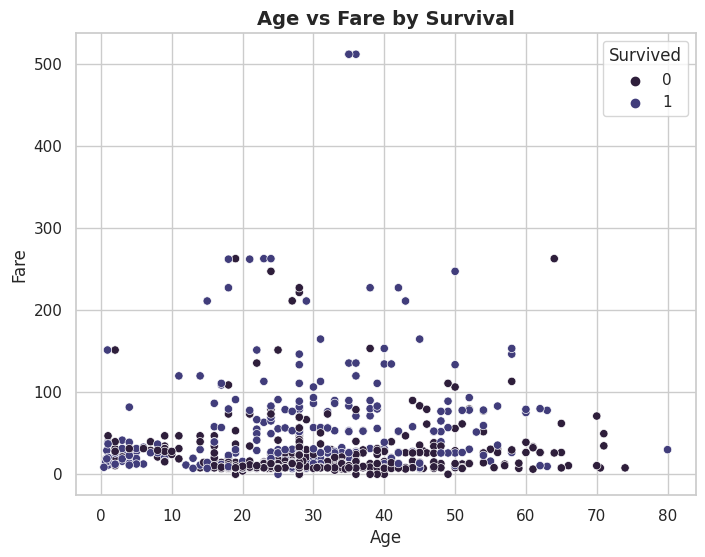

In [367]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Age", y="Fare", hue="Survived")
plt.title("Age vs Fare by Survival",fontweight='bold', fontsize=14)
plt.xlabel("Age")
plt.ylabel("Fare")

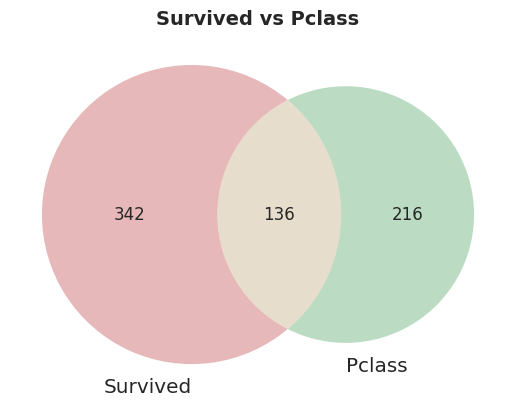

In [368]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns

# Create the Venn diagram
venn2(subsets=(len(df[df['Survived'] == 1]), len(df[df['Pclass'] == 1]), len(df[(df['Survived'] == 1) & (df['Pclass'] == 1)])),
      set_labels=('Survived', 'Pclass'))


mako_palette = sns.color_palette("mako")


plt.title('Survived vs Pclass',fontweight='bold', fontsize=14)


plt.show()


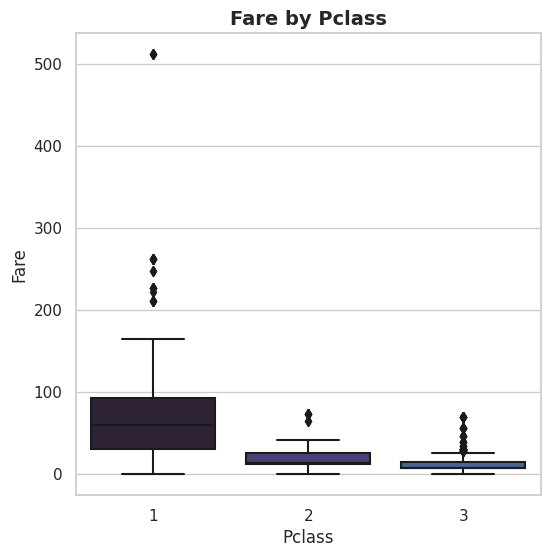

In [369]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, x="Pclass", y="Fare")
mako_palette = sns.color_palette("mako")
plt.title("Fare by Pclass",fontweight='bold', fontsize=14)
plt.xlabel("Pclass")
plt.ylabel("Fare")
plt.show()


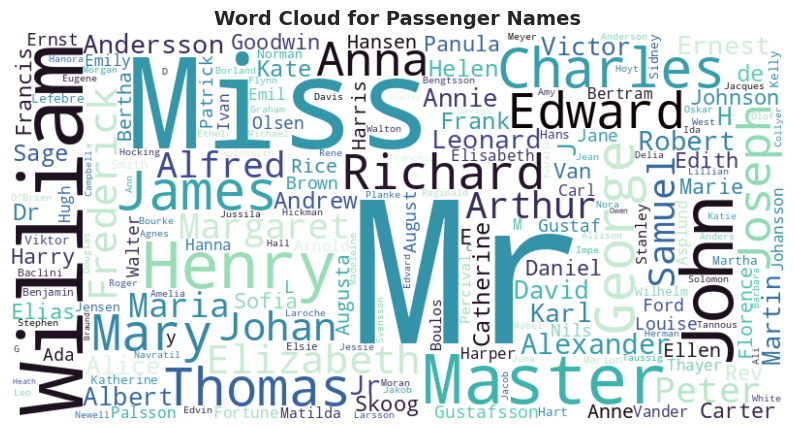

In [370]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


text = ' '.join(df['Name'])

wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False, colormap='mako').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Passenger Names',fontweight='bold', fontsize=14)
plt.axis('off')
plt.show()

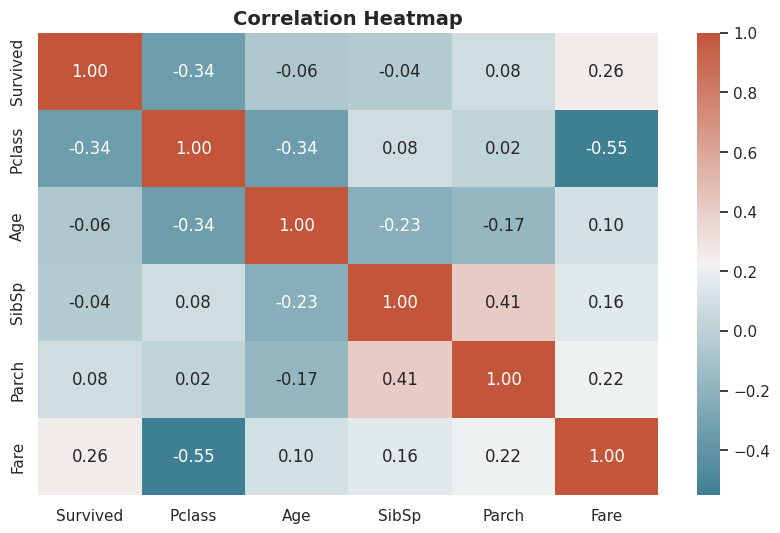

In [371]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a Mako color palette
mako_palette = sns.color_palette("mako")

# Create a diverging color map (cmap) using the Mako palette
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Assuming you have 'df' and 'correlation' defined as in your code
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap=cmap, fmt=".2f")
plt.title("Correlation Heatmap",fontweight='bold', fontsize=14)
plt.show()


Text(0.5, 1.0, 'Directed Graph of Titanic Dataset Columns')

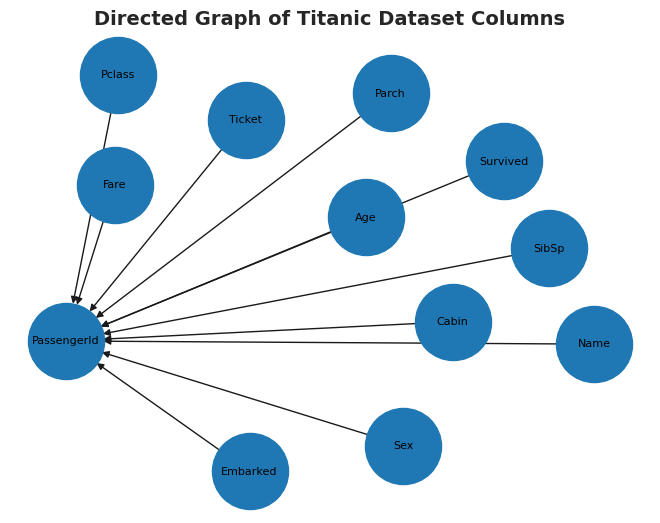

In [372]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a DiGraph (Directed Graph)
G = nx.DiGraph()

# Define nodes for the Titanic dataset columns
columns = [
    "PassengerId", "Survived", "Pclass", "Name", "Sex",
    "Age", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"
]

# Add nodes to the graph
for column in columns:
    G.add_node(column)

# Define relationships between nodes
relationships = [
    ("Survived", "PassengerId"),
    ("Pclass", "PassengerId"),
    ("Name", "PassengerId"),
    ("Sex", "PassengerId"),
    ("Age", "PassengerId"),
    ("SibSp", "PassengerId"),
    ("Parch", "PassengerId"),
    ("Ticket", "PassengerId"),
    ("Fare", "PassengerId"),
    ("Cabin", "PassengerId"),
    ("Embarked", "PassengerId"),
]

# Add edges to represent relationships
for relationship in relationships:
    G.add_edge(relationship[0], relationship[1])

# Define the layout of the graph
pos = nx.spring_layout(G)

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=3000, font_size=8, font_color="black")
plt.title("Directed Graph of Titanic Dataset Columns",fontweight='bold', fontsize=14)

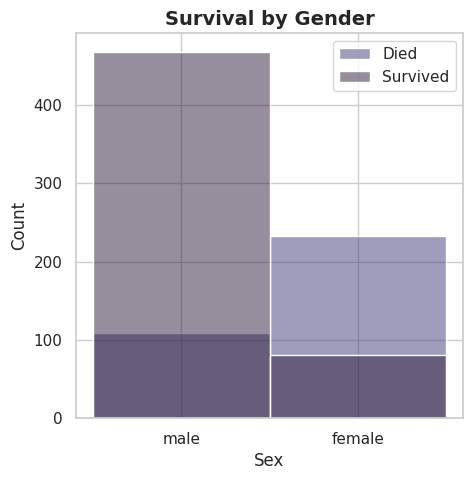

In [373]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette to "mako"
mako_palette = sns.color_palette("mako")
sns.set_palette("mako")

# Create a single subplot
fig, ax = plt.subplots(figsize=(5, 5))

# Plot: Survival by Gender
sns.histplot(data=df, x='Sex', hue='Survived').set_title("Survival by Gender",fontweight='bold', fontsize=14)
plt.legend(labels=['Died', 'Survived'])

plt.show()


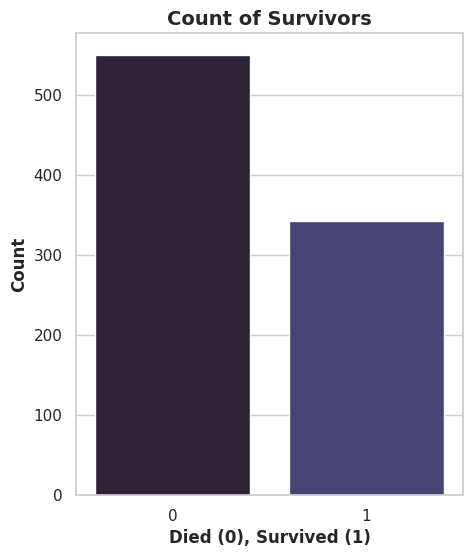

In [374]:
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the "mako" color palette
mako_palette = sns.color_palette("mako")

# Set the palette
sns.set_palette(mako_palette)

# Your existing code for plotting
plt.figure(figsize=(5, 6))
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors', fontweight='bold', fontsize=14)
plt.xlabel('Died (0), Survived (1)', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()


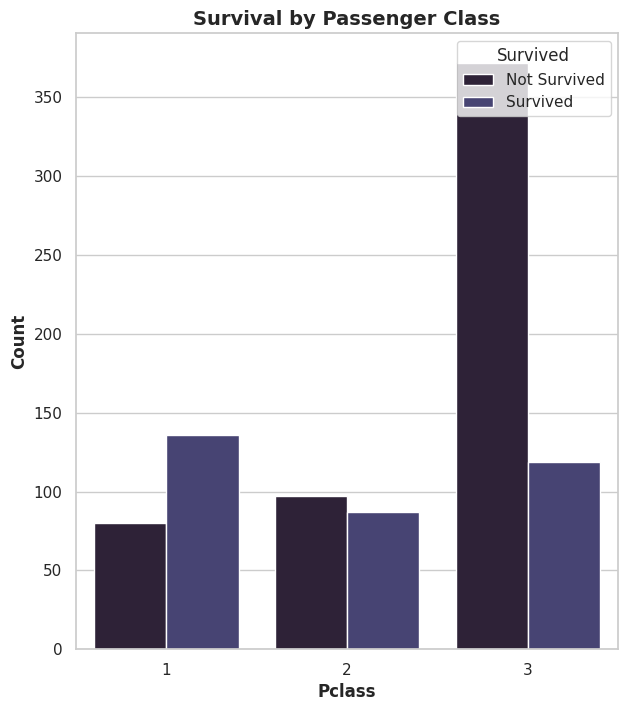

In [375]:
plt.figure(figsize=(7, 8))

mako_palette = sns.color_palette("mako")
sns.set_palette(mako_palette)

sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class', fontweight='bold', fontsize=14)
plt.xlabel('Pclass', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title="Survived", labels=["Not Survived", "Survived"], loc="upper right")
plt.show()

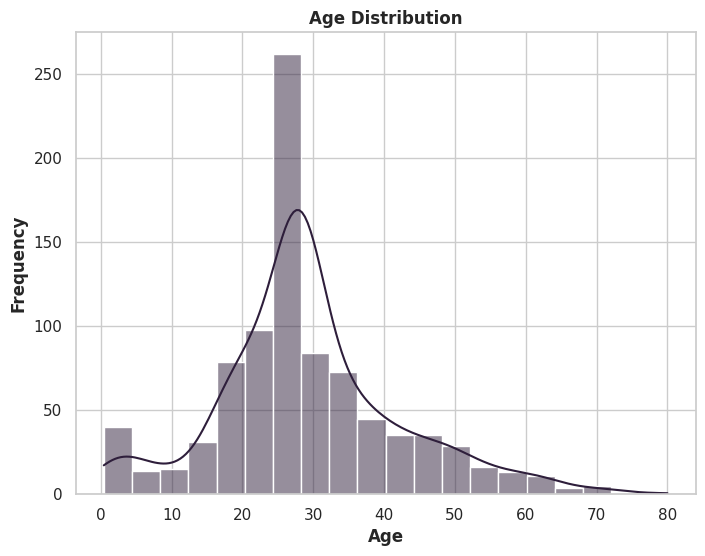

In [376]:
plt.figure(figsize=(8, 6))
mako_palette = sns.color_palette("mako")
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.show()

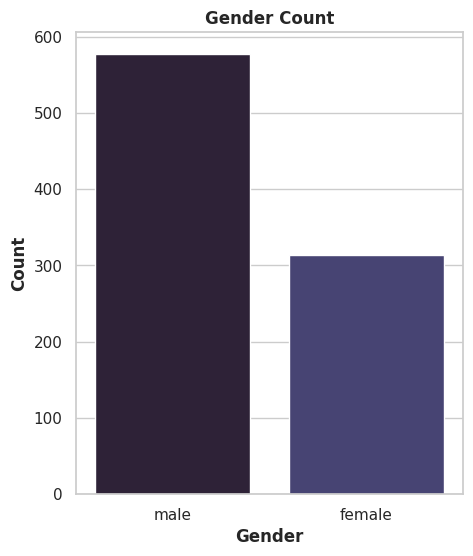

In [377]:
plt.figure(figsize=(5, 6))
mako_palette = sns.color_palette("mako")
sns.countplot(x='Sex', data=df)
plt.title('Gender Count', fontweight='bold')
plt.xlabel('Gender', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

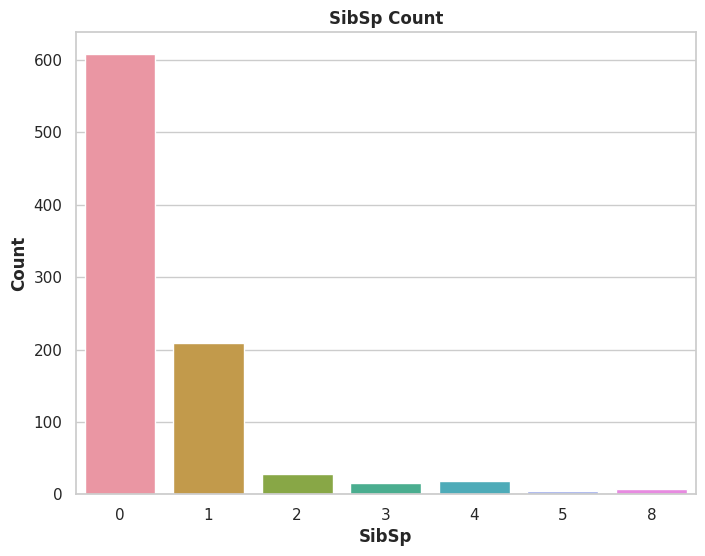

In [395]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.set_palette("mako")
sns.countplot(x='SibSp', data=df)
plt.title('SibSp Count', fontweight='bold')
plt.xlabel('SibSp', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()


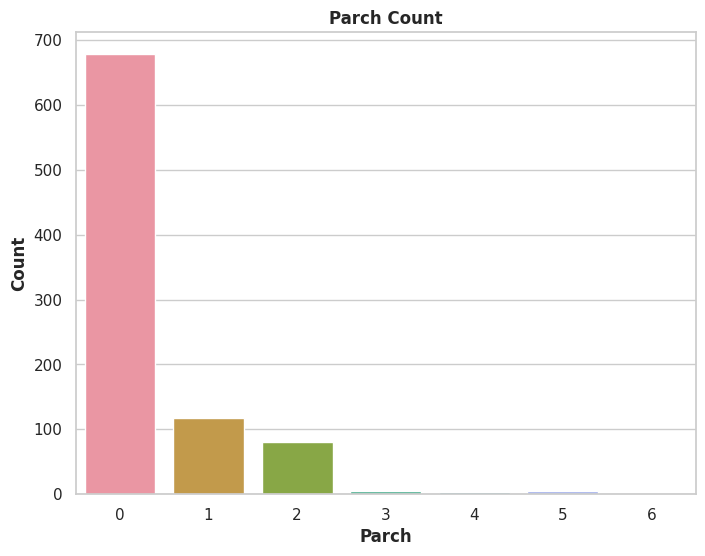

In [392]:
plt.figure(figsize=(8, 6))
sns.set_palette("mako")
sns.countplot(x='Parch', data=df)
plt.title('Parch Count', fontweight='bold')
plt.xlabel('Parch', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

# **Applying ML Model**

In [380]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [381]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [382]:
selected_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Survived']
df = df[selected_features]

In [383]:
X = df.drop('Survived', axis=1)

In [384]:
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [385]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [386]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [387]:
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [388]:
y_pred = clf.predict(X_test)

In [389]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.82
Confusion Matrix:
[[93 12]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

